In [1]:
# Importing libraries, APIS & Tensorflow

# import future

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

# import tensorflow & keras

import tensorflow as tf
import keras

# import modules, libraries, APIs, optimizers, layers, etc...

from tensorflow.keras import Sequential
from tensorflow.keras.layers import (
    Flatten,
    Dense,
    Dropout,
    BatchNormalization,
    Conv2D,
    MaxPool2D,
    MaxPool1D
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.models import model_from_json
from keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
import PIL
from PIL import Image
from contextlib import redirect_stdout

# set another (very high) limit for image processing

PIL.Image.MAX_IMAGE_PIXELS = 9933120000

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

# setting the paths, pathfiles

parent_dir = "C:/Users/Teclast/Documents/Papers/Deep Learning in Artworks/"

train_labels_path = parent_dir + "Classification_Train_Labels.xlsx"
path_train_images = parent_dir
path_test_images = parent_dir

### Setting up all the parameters for the training, processing of data and produced files management ###

# import the labels of the dataset

data = pd.read_excel(train_labels_path, engine="openpyxl")

# check the dataframe to inspect any NaNs or missing values

print(data.head(3))

# check the number of rows and columns of the dataframe

print(data.shape)

Using TensorFlow backend.


        Artist_Name                Painting_Name    Art_Genre  Art Nouveau  \
0  Achille Beltrame     a-moment-s-rest-beltrame  Art Nouveau            1   
1  Achille Beltrame  a-preziuso-villa-amendola-1  Art Nouveau            1   
2  Achille Beltrame                   absturz-l1  Art Nouveau            1   

   Baroque  Cubism  Impressionism  Italian Renaissance  \
0        0       0              0                    0   
1        0       0              0                    0   
2        0       0              0                    0   

   Mannerism-Late Renaissance  Northern Renaissance  Pop Art  \
0                           0                     0        0   
1                           0                     0        0   
2                           0                     0        0   

   Post-Impressionism  Realism  Rococo  Romanticism  Street Art  Surrealism  
0                   0        0       0            0           0           0  
1                   0        0       0   

In [2]:
data_01 = pd.DataFrame()

for i in tqdm(range(0,len(data))):
    if i%10 == 0:
        row = data.iloc[[i]]
        data_01 = data_01.append(row, ignore_index=True)

for i in tqdm(range(0, len(data_01))):
    checkword_delete = data_01["Painting_Name"][i]
    data.drop(data[data['Painting_Name'] == checkword_delete].index, inplace = True)

data = data.reset_index(drop=True)
data_09 = data

100%|██████████| 5360/5360 [03:00<00:00, 29.63it/s]


In [5]:
data_01

,Artist_Name,Painting_Name,Art_Genre,Art Nouveau,Baroque,Cubism,Impressionism,Italian Renaissance,Mannerism-Late Renaissance,Northern Renaissance,Pop Art,Post-Impressionism,Realism,Rococo,Romanticism,Street Art,Surrealism
0,Achille Beltrame,a-moment-s-rest-beltrame,Art Nouveau,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Achille Beltrame,achille-beltrame-female-nude,Art Nouveau,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Achille Beltrame,achille-beltrame-view-over-the-sea,Art Nouveau,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Achille Beltrame,dc-1912-21-d-resadeiturchiarodi,Art Nouveau,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Achille Beltrame,domenica-del-corriere-19-novembre-1899-inaugur...,Art Nouveau,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5355,Victor Brauner,mutation-de-la-natalie-1957,Surrealism,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5356,Victor Brauner,portrait-1960,Surrealism,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5357,Victor Brauner,septi-me-sens-1948,Surrealism,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5358,Victor Brauner,the-philosopher-s-stone-1940,Surrealism,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [6]:
data_09

,Artist_Name,Painting_Name,Art_Genre,Art Nouveau,Baroque,Cubism,Impressionism,Italian Renaissance,Mannerism-Late Renaissance,Northern Renaissance,Pop Art,Post-Impressionism,Realism,Rococo,Romanticism,Street Art,Surrealism
0,Achille Beltrame,a-preziuso-villa-amendola-1,Art Nouveau,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Achille Beltrame,absturz-l1,Art Nouveau,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Achille Beltrame,achille-beltrame-bildnis-einer-frau,Art Nouveau,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Achille Beltrame,achille-beltrame-clash-with-horse-thieves-in-i...,Art Nouveau,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Achille Beltrame,achille-beltrame-courmayeur,Art Nouveau,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48067,Victor Brauner,there-1949,Surrealism,0,0,0,0,0,0,0,0,0,0,0,0,0,1
48068,Victor Brauner,totem-of-blessed-subjectivity-ii-1948,Surrealism,0,0,0,0,0,0,0,0,0,0,0,0,0,1
48069,Victor Brauner,untitled-1934,Surrealism,0,0,0,0,0,0,0,0,0,0,0,0,0,1
48070,Victor Brauner,untitled-1951,Surrealism,0,0,0,0,0,0,0,0,0,0,0,0,0,1


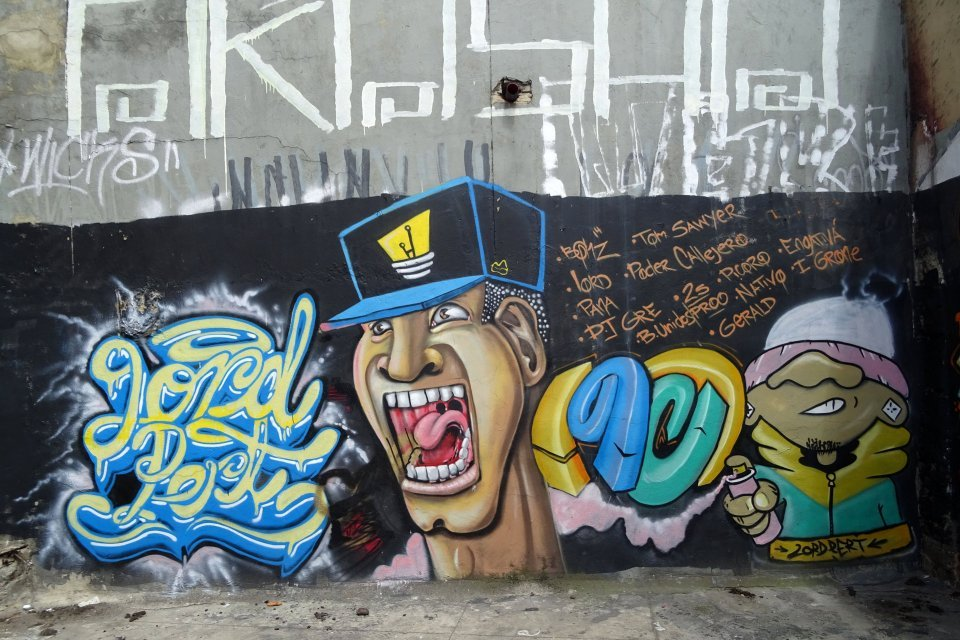